In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
input_file = 'most-recent-cohorts-all-data-elements-1.csv'
column_template = 'column_heading_template.csv'
#there were simply too many wierd columns in the original data set of columns.  I went in and deleted several
#in the master excel file and regenerated the column template.
column_template_2 = 'column_heading_template_new.csv'
path = './data/'
path2 = './data_documentation/'

In [3]:
df = pd.read_csv(path+input_file, low_memory=False)

In [4]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,PrivacySuppressed,PrivacySuppressed,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.loc[1,'UNITID']

100663

In [6]:
len(df)

6806

In [7]:
df.replace(to_replace = 'PrivacySuppressed', value = nan, inplace = True)

In [8]:
df.loc[df['OPEID6'] == 21997, 'MN_EARN_WNE_P8']

23    NaN
Name: MN_EARN_WNE_P8, dtype: object

In [9]:
column_heading_df = pd.read_csv(path2 + column_template_2)

In [10]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
0,academics,Average number of months needed to complete la...,program_reporter.program_1.cip_6_digit.avg_mon...,integer,MTHCMP1
1,academics,Average number of months needed to complete pr...,program_reporter.program_2.cip_6_digit.avg_mon...,integer,MTHCMP2
2,academics,Average number of months needed to complete pr...,program_reporter.program_3.cip_6_digit.avg_mon...,integer,MTHCMP3
3,academics,Average number of months needed to complete pr...,program_reporter.program_4.cip_6_digit.avg_mon...,integer,MTHCMP4
4,academics,Average number of months needed to complete pr...,program_reporter.program_5.cip_6_digit.avg_mon...,integer,MTHCMP5
...,...,...,...,...,...
423,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD
424,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA
425,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH
426,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN


In [11]:
complete_variable_name_list = df.columns.to_list()
complete_variable_name_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [12]:
filtered_variable_name_list = column_heading_df['VARIABLE NAME'].unique().tolist()
filtered_variable_name_list

['MTHCMP1',
 'MTHCMP2',
 'MTHCMP3',
 'MTHCMP4',
 'MTHCMP5',
 'MTHCMP6',
 'CIP01BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP26BACHL',
 'CIP52BACHL',
 'CIP09BACHL',
 'CIP10BACHL',
 'CIP11BACHL',
 'CIP46BACHL',
 'CIP13BACHL',
 'CIP15BACHL',
 'CIP14BACHL',
 'CIP23BACHL',
 'CIP19BACHL',
 'CIP16BACHL',
 'CIP51BACHL',
 'CIP54BACHL',
 'CIP43BACHL',
 'CIP22BACHL',
 'CIP24BACHL',
 'CIP25BACHL',
 'CIP27BACHL',
 'CIP47BACHL',
 'CIP29BACHL',
 'CIP30BACHL',
 'CIP03BACHL',
 'CIP31BACHL',
 'CIP12BACHL',
 'CIP38BACHL',
 'CIP40BACHL',
 'CIP48BACHL',
 'CIP42BACHL',
 'CIP44BACHL',
 'CIP41BACHL',
 'CIP45BACHL',
 'CIP39BACHL',
 'CIP49BACHL',
 'CIP50BACHL',
 'CIPCODE1',
 'CIPCODE2',
 'CIPCODE3',
 'CIPCODE4',
 'CIPCODE5',
 'CIPCODE6',
 'CIPTITLE1',
 'CIPTITLE2',
 'CIPTITLE3',
 'CIPTITLE4',
 'CIPTITLE5',
 'CIPTITLE6',
 'PRGMOFR',
 'PCIP01',
 'PCIP04',
 'PCIP05',
 'PCIP26',
 'PCIP52',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP46',
 'PCIP13',
 'PCIP15',
 'PCIP14',
 'PCIP23',
 'PCIP19',
 'PCIP16',
 'PCIP51',
 'PCIP54

In [13]:
df['PCT90_EARN_WNE_P10']

0       70000
1       84000
2       79500
3       93300
4       55400
        ...  
6801      NaN
6802      NaN
6803      NaN
6804      NaN
6805      NaN
Name: PCT90_EARN_WNE_P10, Length: 6806, dtype: object

In [14]:
filtered_df = df.copy()


In [15]:
for variable in complete_variable_name_list:
    if variable not in filtered_variable_name_list:
        filtered_df.drop(columns = variable, inplace = True)

In [16]:
filtered_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,https://www.gmc.edu/index.cms,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,NaN,NaN,0,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,www.hci.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
filtered_df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'INSTURL', 'SCH_DEG', 'MAIN',
       ...
       'CIPTFBSANNUAL5', 'CIPTFBSANNUAL6', 'MTHCMP1', 'MTHCMP2', 'MTHCMP3',
       'MTHCMP4', 'MTHCMP5', 'MTHCMP6', 'FTFTPCTFLOAN_POOLED_SUPP',
       'SCUGFFN_POOLED'],
      dtype='object', length=428)

In [18]:
column_heading_df['dev-category'].unique()

array(['academics', 'admissions', 'aid', 'completion', 'cost', 'earnings',
       'repayment', 'root', 'school', 'student'], dtype=object)

In [19]:
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6801,48511112,157114,1571,Georgia Military College - Dublin,Dublin,GA,310215149,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6802,48511113,157115,1571,Georgia Military College - Eastman,Eastman,GA,310236109,Southern Association of Colleges and Schools C...,https://www.gmc.edu/index.cms,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6803,48616901,4204801,42048,American College of Barbering - Florence,Florence,KY,410421801,National Accrediting Commission of Career Arts...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6804,49005401,4182601,41826,HCI College - Fort Lauderdale Campus,Fort Lauderdale,FL,33309,Accrediting Commission of Career Schools and C...,www.hci.edu/,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df['INSTNM'] == 'Harvard University', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1492,3,15561.0,50420.0


In [21]:
df.loc[df['INSTNM'] == 'Ohio State University-Main Campus', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
2666,3,NaN,10726.0


In [22]:
df.loc[df['INSTNM'] == 'Dartmouth College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
1959,3,31449.0,55453.0


In [23]:
df.loc[df['INSTNM'] == 'Harvey Mudd College', ['PREDDEG','NPT4_PRIV', 'TUITIONFEE_IN']]

,PREDDEG,NPT4_PRIV,TUITIONFEE_IN
315,3,32739.0,56620.0


In [24]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'OMENRUP_PARTTIME_POOLED_SUPP', 'FTFTPCTPELL', 'FTFTPCTFLOAN', 'UG12MN',
       'G12MN', 'SCUGFFN', 'POOLYRS_FTFTAIDPCT', 'FTFTPCTPELL_POOLED_SUPP',
       'FTFTPCTFLOAN_POOLED_SUPP', 'SCUGFFN_POOLED'],
      dtype='object', length=1986)

In [25]:
df['PREDDEG']

0       3
1       3
2       3
3       3
4       3
       ..
6801    0
6802    0
6803    0
6804    0
6805    0
Name: PREDDEG, Length: 6806, dtype: int64

In [26]:
df.loc[df['PREDDEG'] == 3, :]

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_PARTTIME_POOLED_SUPP,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,0.3193,0.7057,0.7143,5343.0,1165.0,1288.0,2.0,0.7083,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.2475,0.3788,0.5350,14445.0,10498.0,2228.0,2.0,0.3891,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.2836,1.0000,1.0000,440.0,527.0,5.0,4.0,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.2496,0.2707,0.4556,8145.0,2443.0,1341.0,2.0,0.2378,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,0.2621,0.7792,0.7539,4732.0,642.0,951.0,2.0,0.7684,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,Transnational Association of Christian College...,championchristiancollege.com,championchristiancollege.com/NetPriceCalculato...,...,NaN,0.0000,0.0000,57.0,NaN,20.0,4.0,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,Southern Association of Colleges and Schools C...,elpaso.ttuhsc.edu/,www.depts.ttu.edu/financialaid/netCostCalcHome...,...,NaN,NaN,NaN,370.0,471.0,0.0,4.0,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,Higher Learning Commission,https://www.chamberlain.edu/,https://www.chamberlain.edu/admissions/financi...,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,Higher Learning Commission,www.drury.edu/ccps/,tcc.ruffalonl.com/Drury%20University/Freshman-...,...,0.3681,0.7619,0.4048,2857.0,NaN,42.0,2.0,0.7619,0.4048,42.0


In [27]:
cost_df = filtered_df.loc[df['PREDDEG'] == 3, ['INSTNM', 'STABBR','TUITIONFEE_IN', 'TUITIONFEE_OUT', 'PCT10_EARN_WNE_P6', 'PCT25_EARN_WNE_P6', 'PCT75_EARN_WNE_P6', 'PCT90_EARN_WNE_P6', 'MN_EARN_WNE_P6']]

In [28]:
cost_df

,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,Alabama A & M University,AL,9744.0,18354.0,4500,15000,36800,51400,28400
1,University of Alabama at Birmingham,AL,8568.0,19704.0,9700,21000,50800,66200,39400
2,Amridge University,AL,6900.0,6900.0,7300,15200,47200,75400,35400
3,University of Alabama in Huntsville,AL,10714.0,22362.0,9100,22700,56900,70300,40300
4,Alabama State University,AL,11068.0,19396.0,4300,13700,32100,39800,24400
...,...,...,...,...,...,...,...,...,...
6299,Champion Christian College,AR,5240.0,5240.0,NaN,NaN,NaN,NaN,NaN
6314,Texas Tech University Health Sciences Center-E...,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6318,Chamberlain University-Louisiana,LA,19375.0,19375.0,NaN,NaN,NaN,NaN,NaN
6319,Drury University-College of Continuing Profess...,MO,6247.0,6247.0,NaN,NaN,NaN,NaN,NaN


In [29]:
cost_df = cost_df.fillna(0)

In [30]:
cost_df=cost_df.sort_values(by = 'TUITIONFEE_IN', ascending = False).reset_index()

In [31]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000
4,2219,Jewish Theological Seminary of America,NY,56778.0,56778.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2053,229,Sofia University,CA,0.0,0.0,0,0,0,0,0
2054,2347,SUNY Downstate Health Sciences University,NY,0.0,0.0,34900,55100,98700,127700,80400
2055,3560,Bon Secours Memorial College of Nursing,VA,0.0,0.0,26300,36200,63900,71800,50600
2056,309,Golden Gate University-San Francisco,CA,0.0,0.0,14100,43000,94000,127100,72900


In [32]:
cost_df['TUITIONFEE_IN'].astype('int')

0       59430
1       58230
2       56960
3       56910
4       56778
        ...  
2053        0
2054        0
2055        0
2056        0
2057        0
Name: TUITIONFEE_IN, Length: 2058, dtype: int32

In [33]:
cost_df['product'] = (cost_df['TUITIONFEE_IN'].astype('int')* cost_df['TUITIONFEE_OUT'].astype('int')* cost_df['PCT10_EARN_WNE_P6'].astype('int') * cost_df['PCT25_EARN_WNE_P6'].astype('int') * cost_df['PCT75_EARN_WNE_P6'].astype('int') * cost_df['PCT90_EARN_WNE_P6'].astype('int') * cost_df['MN_EARN_WNE_P6'].astype('int')).astype('bool')

In [34]:
cost_df['product']

0        True
1        True
2        True
3        True
4       False
        ...  
2053    False
2054    False
2055    False
2056    False
2057    False
Name: product, Length: 2058, dtype: bool

In [35]:
cost_df = cost_df.loc[cost_df['product'], :]

In [36]:
cost_df

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900,True
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100,True
2,2368,Vassar College,NY,56960.0,56960.0,9000,22700,49900,61200,39400,True
3,600,Trinity College,CT,56910.0,56910.0,13500,30600,66800,87100,52000,True
5,315,Harvey Mudd College,CA,56620.0,56620.0,14900,42600,109000,115800,87200,True
...,...,...,...,...,...,...,...,...,...,...,...
1935,2507,Western Carolina University,NC,3926.0,7926.0,8900,20300,41600,50900,33400,True
1940,2467,University of North Carolina at Pembroke,NC,3418.0,7418.0,6800,16700,37500,48900,28900,True
1942,2417,Elizabeth City State University,NC,3194.0,7194.0,4300,14500,33600,41000,25100,True
1945,3163,Oglala Lakota College,SD,2684.0,2684.0,1300,6500,26900,36200,18400,True


In [37]:
cost_df.loc[cost_df['INSTNM'] == 'Ohio State University-Main Campus', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500,True


In [38]:
cost_df.loc[cost_df['index'] == 2666, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
1382,2666,Ohio State University-Main Campus,OH,10726.0,30742.0,10700,24400,54000,65700,41500,True


In [39]:
cost_df.loc[cost_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400,True


In [40]:
cost_clean_df = cost_df.copy()

In [41]:
x = cost_clean_df['TUITIONFEE_IN'].to_list()
y1 = cost_clean_df['PCT10_EARN_WNE_P6'].astype(int).to_list()
y2 = cost_clean_df['PCT25_EARN_WNE_P6'].astype(int).to_list()
y3 = cost_clean_df['PCT75_EARN_WNE_P6'].astype(int).to_list()
y4 = cost_clean_df['PCT90_EARN_WNE_P6'].astype(int).to_list()
y5 = cost_clean_df['MN_EARN_WNE_P6'].astype(int).to_list()

In [42]:
x_y_df = cost_clean_df[['TUITIONFEE_IN', 'MN_EARN_WNE_P6']]


In [43]:
x_y_df

,TUITIONFEE_IN,MN_EARN_WNE_P6
0,59430.0,77900
1,58230.0,72100
2,56960.0,39400
3,56910.0,52000
5,56620.0,87200
...,...,...
1935,3926.0,33400
1940,3418.0,28900
1942,3194.0,25100
1945,2684.0,18400


In [44]:
#before doing the line fit let us drop all rows with a 0 in either tuition or earnings
x_y_filtered_df = x_y_df.loc[(x_y_df['TUITIONFEE_IN'] != 0) & (x_y_df['MN_EARN_WNE_P6'] != 0), :]

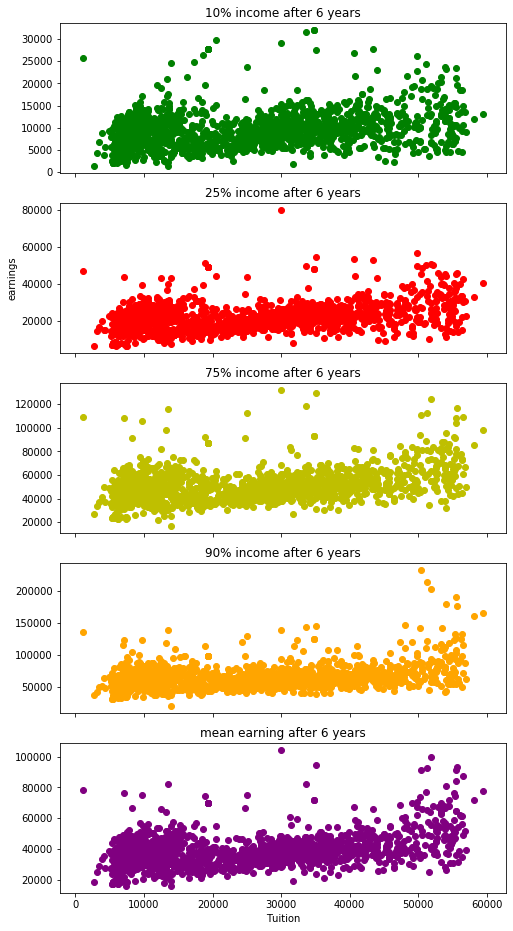

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex = True, figsize=(8,16))
ax1.set_title("10% income after 6 years")
ax2.set_title("25% income after 6 years")
ax3.set_title("75% income after 6 years")
ax4.set_title("90% income after 6 years")
ax5.set_title("mean earning after 6 years")
ax5.set_xlabel("Tuition")
ax2.set_ylabel("earnings")
ax1.scatter(x,y1, color = 'g')

ax2.scatter(x,y2, color = 'r')

ax3.scatter(x,y3, color = 'y')

ax4.scatter(x,y4, color = 'orange')
ax5.scatter(x,y5, color = 'purple')

plt.show()

In [46]:
x_line = np.array(x_y_filtered_df['TUITIONFEE_IN'])

In [47]:
y_line = np.array(x_y_filtered_df['MN_EARN_WNE_P6'])

In [48]:
x_line = x_line.reshape(-1,1)

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_line, y_line)

In [50]:
fit_r2 = reg.score(x_line, y_line)

In [51]:
reg.coef_

array([0.278746])

In [52]:
reg.intercept_

32143.64304468973

In [53]:
32143+.15*50000

39643.0

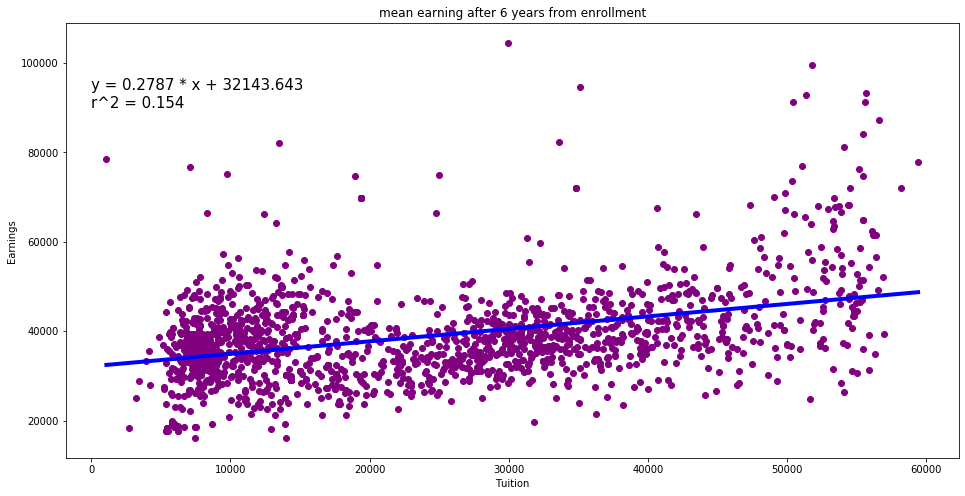

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(figsize=(16,8))

ax1.set_title("mean earning after 6 years from enrollment")
plt.rc('figure', titlesize=30)
plt.rc('axes', titlesize=20)
ax1.scatter(x,y5, color = 'purple')

ax1.text(2, 90000, 'y = %.4f * x + %.3f\nr^2 = %.3f'%(reg.coef_, reg.intercept_, fit_r2) , fontsize=15)
ax1.plot(x, reg.coef_*x + reg.intercept_, color = 'b', linewidth = 4)
ax1.set_xlabel("Tuition")
ax1.set_ylabel("Earnings")
plt.show()
fig.savefig(path2 + 'earnings_tuition.png')

In [55]:
cost_clean_df.loc[cost_clean_df['PCT90_EARN_WNE_P6'].astype(int) > 150000, :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
0,2153,Columbia University in the City of New York,NY,59430.0,59430.0,13200,40500,97900,165900,77900,True
1,890,University of Chicago,IL,58230.0,58230.0,11900,33200,85200,160400,72100,True
15,2413,Duke University,NC,55695.0,55695.0,19700,46000,117100,176900,93200,True
16,2992,University of Pennsylvania,PA,55584.0,55584.0,23500,45400,108000,191500,91200,True
50,621,Georgetown University,DC,54104.0,54104.0,23300,44200,95500,179900,81100,True
90,1508,Massachusetts Institute of Technology,MA,51832.0,51832.0,19400,50800,124100,203700,99600,True
96,3841,Stanford University,CA,51354.0,51354.0,18700,41600,112800,214600,92800,True
104,1492,Harvard University,MA,50420.0,50420.0,18800,45100,111300,233800,91300,True


In [56]:
cost_clean_df.loc[cost_clean_df['INSTNM'] == 'Smith College', :]

,index,INSTNM,STABBR,TUITIONFEE_IN,TUITIONFEE_OUT,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,MN_EARN_WNE_P6,product
81,1544,Smith College,MA,52404.0,52404.0,8900,18900,48700,63300,37400,True


In [57]:
cost_clean_df.describe()

,index,TUITIONFEE_IN,TUITIONFEE_OUT
count,1602.00000,1602.000000,1602.000000
mean,2140.97191,23996.546192,27907.703496
std,1213.86090,14734.583764,12320.538559
min,0.00000,1080.000000,1080.000000
25%,1146.25000,10409.000000,18377.000000
50%,2102.50000,21912.000000,26664.000000
75%,3077.75000,34628.750000,35807.500000
max,5577.00000,59430.000000,59430.000000


In [58]:
#PREDEG == 3 is the university is predominately a 4 year school.
filtered_4_year_df = filtered_df.loc[df['PREDDEG'] == 3, :]
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4048,42.0


In [59]:
filtered_4_year_df = filtered_4_year_df.fillna(0)
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,492069,4276100,42761,Champion Christian College,Hot Springs,AR,71913,championchristiancollege.com,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.0
6314,492689,1067401,10674,Texas Tech University Health Sciences Center-E...,El Paso,TX,79905-2827,elpaso.ttuhsc.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6318,492759,638521,6385,Chamberlain University-Louisiana,Jefferson,LA,70121,https://www.chamberlain.edu/,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
6319,492801,246100,2461,Drury University-College of Continuing Profess...,Springfield,MO,65802,www.drury.edu/ccps/,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4048,42.0


Begin random forest regession.

In [60]:
#try to predict median income.  Must drop all columns relating to income from data set.
#determine all column headings with earnings as the dev-category
column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', :]

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
204,earnings,10th percentile of earnings of students workin...,10_yrs_after_entry.working_not_enrolled.earnin...,integer,PCT10_EARN_WNE_P10
205,earnings,10th percentile of earnings of students workin...,6_yrs_after_entry.working_not_enrolled.earning...,integer,PCT10_EARN_WNE_P6
206,earnings,10th percentile of earnings of students workin...,8_yrs_after_entry.10th_percentile_earnings,integer,PCT10_EARN_WNE_P8
207,earnings,25th percentile of earnings of students workin...,10_yrs_after_entry.working_not_enrolled.earnin...,integer,PCT25_EARN_WNE_P10
208,earnings,25th percentile of earnings of students workin...,6_yrs_after_entry.working_not_enrolled.earning...,integer,PCT25_EARN_WNE_P6
...,...,...,...,...,...
274,earnings,Standard deviation of earnings of students wor...,10_yrs_after_entry.working_not_enrolled.std_dev,integer,SD_EARN_WNE_P10
275,earnings,Standard deviation of earnings of students wor...,6_yrs_after_entry.working_not_enrolled.std_dev,integer,SD_EARN_WNE_P6
276,earnings,Standard deviation of earnings of students wor...,7_yrs_after_entry.std_dev,float,SD_EARN_WNE_P7
277,earnings,Standard deviation of earnings of students wor...,8_yrs_after_entry.std_deviation,float,SD_EARN_WNE_P8


In [61]:
#make a list of these variable names
earning_variable_name = column_heading_df.loc[column_heading_df['dev-category'] == 'earnings', 'VARIABLE NAME'].to_list()
earning_variable_name

['PCT10_EARN_WNE_P10',
 'PCT10_EARN_WNE_P6',
 'PCT10_EARN_WNE_P8',
 'PCT25_EARN_WNE_P10',
 'PCT25_EARN_WNE_P6',
 'PCT25_EARN_WNE_P8',
 'PCT75_EARN_WNE_P10',
 'PCT75_EARN_WNE_P6',
 'PCT75_EARN_WNE_P8',
 'PCT90_EARN_WNE_P10',
 'PCT90_EARN_WNE_P6',
 'PCT90_EARN_WNE_P8',
 'MN_EARN_WNE_INDEP0_P10',
 'MN_EARN_WNE_INDEP0_INC1_P10',
 'MN_EARN_WNE_INDEP0_P6',
 'MN_EARN_WNE_INDEP0_INC1_P6',
 'MN_EARN_WNE_MALE0_P10',
 'MN_EARN_WNE_MALE0_P6',
 'MN_EARN_WNE_INDEP1_P10',
 'MN_EARN_WNE_INDEP1_P6',
 'MN_EARN_WNE_MALE1_P10',
 'MN_EARN_WNE_MALE1_P6',
 'MN_EARN_WNE_P10',
 'MN_EARN_WNE_INC3_P10',
 'MN_EARN_WNE_INC1_P10',
 'MN_EARN_WNE_INC2_P10',
 'MN_EARN_WNE_P6',
 'MN_EARN_WNE_INC3_P6',
 'MN_EARN_WNE_INC1_P6',
 'MN_EARN_WNE_INC2_P6',
 'MN_EARN_WNE_P7',
 'MN_EARN_WNE_P8',
 'MN_EARN_WNE_P9',
 'MD_EARN_WNE_P10',
 'MD_EARN_WNE_P6',
 'MD_EARN_WNE_P8',
 'COUNT_WNE_INDEP0_P10',
 'COUNT_WNE_INDEP0_INC1_P10',
 'COUNT_WNE_INDEP0_P6',
 'COUNT_WNE_INDEP0_INC1_P6',
 'COUNT_WNE_MALE0_P10',
 'COUNT_WNE_MALE0_P6',
 'COU

In [62]:
#need to drop all rows that have a 0
row_mean_0 = filtered_4_year_df.loc[filtered_4_year_df['MN_EARN_WNE_P6'] == 0, :].index
row_mean_0

Int64Index([  23,   44,   57,  193,  229,  231,  328,  338,  339,  398,
            ...
            6252, 6254, 6261, 6263, 6271, 6299, 6314, 6318, 6319, 6322],
           dtype='int64', length=232)

In [63]:
filtered_4_year_df = filtered_4_year_df.drop(index = row_mean_0)


In [64]:
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [65]:
filtered_4_year_df.to_csv(path2+'filter_4_year_df.csv')

In [66]:
#filter 4 year file based on only main campus
filtered_4_year_main_df = filtered_4_year_df.loc[filtered_4_year_df['MAIN'] == 1, :]

In [67]:
filtered_4_year_main_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778,482158,158100,1581,Middle Georgia State University,Macon,GA,31206,https://www.mga.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5295,2317.0
5798,482477,1072700,10727,DeVry University-Illinois,Chicago,IL,60618,https://www.devry.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.913,517.0
5809,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,www.ung.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3079,7300.0
5900,484613,2098800,20988,University of Phoenix-Arizona,Phoenix,AZ,85040,https://www.phoenix.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7745,9022.0


In [68]:
filtered_4_year_main_df.to_csv(path2+'filter_4_year_main_df.csv')

In [69]:
filtered_4_year_column_list = filtered_4_year_df.columns.tolist()
filtered_4_year_column_list

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'INSTURL',
 'SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52

In [70]:
#value for y is mean earning 6 years from enrollment
y = filtered_4_year_df['MN_EARN_WNE_P6']
y_baseline = y

In [71]:
from pandas.api.types import is_numeric_dtype

In [72]:
#for X we need to drop all columns that are earnings.  We have kept the one we care about as y.
for variable in earning_variable_name:
    if variable in filtered_4_year_column_list :
        filtered_4_year_df.drop(columns = variable, inplace = True)

In [73]:
y

0       28400
1       39400
2       35400
3       40300
4       24400
        ...  
5911    34200
5912    34200
5914    18500
5918    39300
5931    71900
Name: MN_EARN_WNE_P6, Length: 1826, dtype: object

In [74]:
#note the fewer columns.  All earnings categories were deleted.
filtered_4_year_df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,INSTURL,SCH_DEG,MAIN,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,www.aamu.edu/,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,https://www.uab.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,www.amridgeuniversity.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,www.uah.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,www.alasu.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,484765,42098889,20988,University of Phoenix-Virginia,Virginia Beach,VA,23462,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,484783,42098854,20988,University of Phoenix-Pennsylvania,Philadelphia,PA,19103,https://www.phoenix.edu,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,484835,2189106,21891,CEM College-Mayaguez,Mayaguez,PR,00680-0000,www.cemcollege.edu/cem/,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,484905,4242100,42421,University of North Texas at Dallas,Dallas,TX,75241,untdallas.edu,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [75]:
#need to drop all text based columns
filtered_4_year_df = filtered_4_year_df.drop(columns = ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'INSTURL'])

In [76]:
#get list of remaining columns to determine which ones still contain some text
column_list = filtered_4_year_df.columns.to_list()

In [77]:
column_list

['SCH_DEG',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'MENONLY',
 'WOMENONLY',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'CIP01BACHL',
 'CIP03BACHL',
 'CIP04BACHL',
 'CIP05BACHL',
 'CIP09BA

In [78]:
len(column_list)

345

In [79]:
filtered_4_year_df['VETERAN'].dtypes

dtype('O')

In [80]:
is_numeric_dtype(filtered_4_year_df['VETERAN'])

False

In [81]:
filtered_4_year_df['FEMALE'].dtypes

dtype('O')

In [82]:
for value in filtered_4_year_df['FEMALE']:
    print(value)

0.5640301318
0.6390907397
0.6486486486
0.4763499372
0.6134185304
0.6152524168
0.705078125
0.6929480901
0.531504671
0.520361991
0.7628668652
0.6387315968
0.4704142012
0.5886792453
0
0.5577586207
0.4668079096
0.6732804233
0.6827586207
0.6013931889
0.5860805861
0.6588785047
0.6229367631
0.6452599388
0.4610051993
0.4897540984
0.6510154346
0.6509505703
0.2394366197
0.5987699877
0.5940482875
0.6301369863
0.5568306611
0.5628539071
0.5445544554
0.1816434407
0.743284234
0.6385814497
0.6274509804
0.6956521739
0.2894736842
0.6464909992
0.8375
0.4325068871
0.5588193956
0.5960854093
0.6108749161
0.5661364132
0.6165561287
0.4609929078
0.3921568627
0.5682910089
0.5543415756
0.505952381
0.6155844156
0.4945054945
0.4859550562
0.6232439336
0.4346153846
0.5619419643
0.5636766334
0.5731981982
0.5523465704
0.7258883249
0.6677920324
0.7764705882
0.6606170599
0.6189189189
0.4565217391
0.6172284644
0.5029626253
0.6426605505
0.6771726535
0.6247122956
0.4947096457
0.5745917085
0.6572807723
0.6211972522
0.598007

0
0.605735746
0.4632142857
0.7508344853
0.7508344853
0.6553030303
0.8969863014
0.8969863014
0.8969863014
0.6274509804
0.8568994889
0
0.2235217674
0.2235217674
0.7508344853
0.5593906672
0.8969863014
0.7977900552
0.7977900552
0.488700565
0.7508344853
0.7508344853
0.7508344853
0.7508344853
0.7508344853
0.4632142857
0.7628668652
0.7628668652
0.8135465189
0.8135465189
0.7508344853
0.6353397118
0.8969863014
0.8969863014
0.8969863014
0.7628668652
0.7258883249
0.7628668652
0.646684832
0.5983240223
0.8969863014
0.8969863014
0.7977900552
0.5012260053
0.7967492381
0.7628668652
0.7628668652
0.6357142857
0.6840336134
0.5243741765
0.7628668652
0.673245614
0.5888059701
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.6059049017
0.5747065101
0.541089566
0.5568306611
0.5937902879
0.6972811618
0.6972811618
0.6972811618
0.6972811618
0.6972811618


In [83]:
i=0
for row in column_list:
    i=i+1
    not_numeric = not is_numeric_dtype(filtered_4_year_df[row])
    if not_numeric:
        print(i, row)

218 WDRAW_ORIG_YR2_RT
219 DEP_COMP_ORIG_YR6_RT
220 RPY_1YR_RT
221 COMPL_RPY_1YR_RT
222 NONCOM_RPY_1YR_RT
223 LO_INC_RPY_1YR_RT
224 MD_INC_RPY_1YR_RT
225 HI_INC_RPY_1YR_RT
226 DEP_RPY_1YR_RT
227 IND_RPY_1YR_RT
228 PELL_RPY_1YR_RT
229 NOPELL_RPY_1YR_RT
230 FEMALE_RPY_1YR_RT
231 MALE_RPY_1YR_RT
232 FIRSTGEN_RPY_1YR_RT
233 NOTFIRSTGEN_RPY_1YR_RT
234 RPY_3YR_RT
235 COMPL_RPY_3YR_RT
236 NONCOM_RPY_3YR_RT
237 LO_INC_RPY_3YR_RT
238 MD_INC_RPY_3YR_RT
239 HI_INC_RPY_3YR_RT
240 DEP_RPY_3YR_RT
241 IND_RPY_3YR_RT
242 PELL_RPY_3YR_RT
243 NOPELL_RPY_3YR_RT
244 FEMALE_RPY_3YR_RT
245 MALE_RPY_3YR_RT
246 FIRSTGEN_RPY_3YR_RT
247 NOTFIRSTGEN_RPY_3YR_RT
248 RPY_5YR_RT
249 COMPL_RPY_5YR_RT
250 NONCOM_RPY_5YR_RT
251 LO_INC_RPY_5YR_RT
252 MD_INC_RPY_5YR_RT
253 HI_INC_RPY_5YR_RT
254 DEP_RPY_5YR_RT
255 IND_RPY_5YR_RT
256 PELL_RPY_5YR_RT
257 NOPELL_RPY_5YR_RT
258 FEMALE_RPY_5YR_RT
259 MALE_RPY_5YR_RT
260 FIRSTGEN_RPY_5YR_RT
261 NOTFIRSTGEN_RPY_5YR_RT
262 RPY_7YR_RT
263 COMPL_RPY_7YR_RT
264 NONCOM_RPY_7YR_RT
265 

In [84]:
filtered_4_year_df.replace(to_replace = 'Dental Hygiene/Hygienist', value = 0, inplace = True)

In [85]:
X = filtered_4_year_df
##########################################################################X_base_line = X

In [86]:
print(X.shape, y.shape)

(1826, 345) (1826,)


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [88]:
# random forest generator classifier
from sklearn.ensemble import RandomForestRegressor


In [89]:
rf = RandomForestRegressor()
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7854012812339034

In [90]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([1.88922248e-05, 3.98009738e-05, 6.39687111e-04, 0.00000000e+00,
       2.08762754e-03, 6.33520192e-04, 9.16286284e-04, 1.08673378e-03,
       0.00000000e+00, 1.70820927e-03, 2.79264600e-03, 5.15200473e-03,
       5.30387265e-04, 1.04695997e-03, 2.64195552e-07, 2.26356732e-05,
       3.19908066e-03, 7.28792105e-03, 4.94915862e-04, 4.62844874e-04,
       1.79515367e-03, 6.25580747e-04, 8.42432751e-04, 1.19753444e-03,
       1.05569782e-03, 2.21834427e-03, 5.21814798e-04, 1.14258785e-03,
       3.50109880e-04, 4.04840666e-04, 1.47869986e-04, 9.86936890e-04,
       1.04286820e-03, 4.76454142e-05, 6.86253191e-05, 3.43230226e-04,
       4.58640967e-04, 2.73070775e-03, 8.78555587e-05, 9.21957143e-04,
       3.24329599e-03, 7.48645860e-05, 1.05896264e-03, 8.25587914e-05,
       3.26434598e-04, 5.65916919e-04, 1.01174140e-04, 3.01351841e-03,
       1.52324658e-05, 5.03152866e-03, 6.06687587e-03, 5.45214514e-04,
       9.50344491e-04, 1.77338620e-04, 1.39532675e-04, 6.72009811e-03,
      

In [91]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, column_list), reverse=True)

[(0.14534776303375482, 'RPY_3YR_RT'),
 (0.0873872138629987, 'WDRAW_ORIG_YR2_RT'),
 (0.058023943508163346, 'FAMINC_IND'),
 (0.050069773890975736, 'UGDS_ASIAN'),
 (0.032013113308725534, 'AVGFACSAL'),
 (0.02526894486926293, 'PCIP51'),
 (0.02445604658423968, 'LO_INC_RPY_1YR_RT'),
 (0.02394257280898528, 'RPY_1YR_RT'),
 (0.01939106575357824, 'FIRSTGEN_RPY_7YR_RT'),
 (0.018075327867048303, 'HI_INC_RPY_7YR_RT'),
 (0.01737582671169945, 'IND_RPY_3YR_RT'),
 (0.017048192131577232, 'PCIP50'),
 (0.014764213629249075, 'TUITFTE'),
 (0.013257876420406541, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.012604461910190604, 'INEXPFTE'),
 (0.012276171465666943, 'IND_RPY_7YR_RT'),
 (0.011957734076470435, 'DEP_RPY_3YR_RT'),
 (0.011883836426871656, 'AGE_ENTRY'),
 (0.01132722767367957, 'FIRSTGEN_RPY_5YR_RT'),
 (0.011236559403199555, 'FIRSTGEN_RPY_1YR_RT'),
 (0.011125228242414175, 'IND_RPY_5YR_RT'),
 (0.010436501892489023, 'LO_INC_RPY_3YR_RT'),
 (0.009612952973572552, 'AGEGE24'),
 (0.009046652404635118, 'MARRIED'),
 (0.00864

In [92]:
#OK the repayment success is related to average income.  Makes sense.  If you have money you will repay. All repayment
#columns should be dropped.
repayment_var = column_heading_df.loc[column_heading_df['dev-category'] == 'repayment', 'VARIABLE NAME'].to_list()
repayment_var

['LO_INC_RPY_5YR_RT',
 'MD_INC_RPY_5YR_RT',
 'HI_INC_RPY_5YR_RT',
 'COMPL_RPY_5YR_RT',
 'DEP_RPY_5YR_RT',
 'FEMALE_RPY_5YR_RT',
 'FIRSTGEN_RPY_5YR_RT',
 'IND_RPY_5YR_RT',
 'MALE_RPY_5YR_RT',
 'NONCOM_RPY_5YR_RT',
 'NOTFIRSTGEN_RPY_5YR_RT',
 'NOPELL_RPY_5YR_RT',
 'PELL_RPY_5YR_RT',
 'RPY_5YR_RT',
 'RPY_1YR_RT',
 'RPY_7YR_RT',
 'RPY_3YR_RT',
 'LO_INC_RPY_1YR_RT',
 'MD_INC_RPY_1YR_RT',
 'HI_INC_RPY_1YR_RT',
 'COMPL_RPY_1YR_RT',
 'DEP_RPY_1YR_RT',
 'FEMALE_RPY_1YR_RT',
 'FIRSTGEN_RPY_1YR_RT',
 'IND_RPY_1YR_RT',
 'MALE_RPY_1YR_RT',
 'NONCOM_RPY_1YR_RT',
 'NOTFIRSTGEN_RPY_1YR_RT',
 'NOPELL_RPY_1YR_RT',
 'PELL_RPY_1YR_RT',
 'LO_INC_RPY_7YR_RT',
 'MD_INC_RPY_7YR_RT',
 'HI_INC_RPY_7YR_RT',
 'COMPL_RPY_7YR_RT',
 'DEP_RPY_7YR_RT',
 'FEMALE_RPY_7YR_RT',
 'FIRSTGEN_RPY_7YR_RT',
 'IND_RPY_7YR_RT',
 'MALE_RPY_7YR_RT',
 'NONCOM_RPY_7YR_RT',
 'NOTFIRSTGEN_RPY_7YR_RT',
 'NOPELL_RPY_7YR_RT',
 'PELL_RPY_7YR_RT',
 'LO_INC_RPY_3YR_RT',
 'MD_INC_RPY_3YR_RT',
 'HI_INC_RPY_3YR_RT',
 'COMPL_RPY_3YR_RT',
 'DEP_R

In [93]:
#the a means rev a after the first run of the data.
filtered_4_year_a_df = filtered_4_year_df.copy()
for column_name in repayment_var:
    filtered_4_year_a_df.drop(columns = column_name, inplace = True)

In [94]:
filtered_4_year_a_df

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,3.0,1,1,3,1,1,5,12.0,0.0,34.783368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7287,2698.0
1,3.0,1,1,3,1,1,5,12.0,0.0,33.505697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,4176.0
2,3.0,1,1,3,2,1,5,12.0,0.0,32.362609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,24.0
3,3.0,1,1,3,1,1,5,12.0,0.0,34.724557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4402,2544.0
4,3.0,1,1,3,1,1,5,12.0,0.0,32.364317,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,3.0,0,19,3,3,51,5,21.0,0.0,37.642570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0
5912,3.0,0,19,3,3,42,2,11.0,0.0,39.952190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9412,34.0
5914,2.0,0,4,3,3,72,9,13.0,0.0,18.199097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4915,118.0
5918,3.0,1,1,3,1,48,6,11.0,0.0,32.659588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1793,552.0


In [95]:
X = filtered_4_year_a_df
X_base_line = X
#********************************************************

In [96]:
#X['IND_RPY_1YR_RT']

In [97]:
column_list_a = filtered_4_year_a_df.columns.to_list()

In [98]:
print(X.shape, y.shape)

(1826, 289) (1826,)


In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
rfa = rf.fit(X_train, y_train)
rfa.score(X_test, y_test)

0.824876074877426

In [101]:
# Random Forests in sklearn will automatically calculate feature importance
importancesa = rfa.feature_importances_
importancesa

array([5.24496326e-05, 4.62484198e-05, 1.37983408e-03, 0.00000000e+00,
       2.01381214e-04, 1.26190567e-03, 9.29468161e-04, 1.26779353e-03,
       0.00000000e+00, 2.76792826e-03, 3.54918912e-03, 4.35428224e-03,
       8.76013101e-04, 1.34270417e-03, 1.72135938e-05, 3.59713863e-06,
       2.25203800e-03, 5.19744709e-03, 8.85493287e-04, 1.31484539e-03,
       5.15021169e-03, 1.45775243e-03, 4.54182311e-04, 3.37044156e-04,
       1.84863489e-03, 6.65493584e-03, 5.61356161e-04, 3.14613921e-04,
       1.25008036e-03, 5.00772429e-04, 2.08386176e-04, 8.69691849e-04,
       1.39517051e-03, 1.09653314e-04, 1.01045294e-04, 4.52142302e-04,
       1.90778429e-04, 1.96443251e-03, 4.22938013e-05, 7.01485948e-04,
       4.60045201e-03, 1.12196568e-04, 7.82567358e-04, 5.38809312e-04,
       4.05086498e-04, 1.44014540e-03, 1.30661046e-04, 6.42031632e-03,
       4.02963000e-05, 3.15418081e-03, 2.07950273e-02, 8.71315640e-04,
       7.31057479e-04, 1.72355075e-04, 1.33428485e-04, 2.21962720e-03,
      

In [102]:
# We can sort the features by their importance
importance_list_a = sorted(zip(rfa.feature_importances_, column_list_a), reverse=True)
importance_list_a

[(0.24010423482779192, 'WDRAW_ORIG_YR2_RT'),
 (0.08999209376033197, 'FAMINC_IND'),
 (0.0855639303500042, 'AVGFACSAL'),
 (0.0719252777042588, 'UGDS_ASIAN'),
 (0.052970658896991554, 'PCIP51'),
 (0.04009524946949769, 'INEXPFTE'),
 (0.030868630319941984, 'TUITFTE'),
 (0.025836300752320476, 'PCIP50'),
 (0.020795027315702607, 'PCIP14'),
 (0.015003557625360093, 'UGDS_WHITE'),
 (0.00933292713227731, 'INC_PCT_M2'),
 (0.00877835564420207, 'PCIP52'),
 (0.008736620851366858, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.00849895120120636, 'FEMALE'),
 (0.007233207603282438, 'FAMINC'),
 (0.006810004571392934, 'DEP_COMP_ORIG_YR6_RT'),
 (0.006668248228781508, 'INC_PCT_H2'),
 (0.006654935841090931, 'SATMTMID'),
 (0.006544328219292354, 'PCIP42'),
 (0.006420316321124772, 'PCIP11'),
 (0.0060551505764080095, 'FIRST_GEN'),
 (0.005921292418895331, 'UGDS'),
 (0.00576119552238046, 'MEDIAN_HH_INC'),
 (0.0057244997616540914, 'PCIP49'),
 (0.005674421571941157, 'LOAN_EVER'),
 (0.0054403271153411715, 'PCTFLOAN'),
 (0.0052559730

In [103]:
a_drop_list = []
for tuple in importance_list_a:
    if tuple[0] < 0.0001:
        a_drop_list.append(tuple[1]) 
    print(tuple)

(0.24010423482779192, 'WDRAW_ORIG_YR2_RT')
(0.08999209376033197, 'FAMINC_IND')
(0.0855639303500042, 'AVGFACSAL')
(0.0719252777042588, 'UGDS_ASIAN')
(0.052970658896991554, 'PCIP51')
(0.04009524946949769, 'INEXPFTE')
(0.030868630319941984, 'TUITFTE')
(0.025836300752320476, 'PCIP50')
(0.020795027315702607, 'PCIP14')
(0.015003557625360093, 'UGDS_WHITE')
(0.00933292713227731, 'INC_PCT_M2')
(0.00877835564420207, 'PCIP52')
(0.008736620851366858, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.00849895120120636, 'FEMALE')
(0.007233207603282438, 'FAMINC')
(0.006810004571392934, 'DEP_COMP_ORIG_YR6_RT')
(0.006668248228781508, 'INC_PCT_H2')
(0.006654935841090931, 'SATMTMID')
(0.006544328219292354, 'PCIP42')
(0.006420316321124772, 'PCIP11')
(0.0060551505764080095, 'FIRST_GEN')
(0.005921292418895331, 'UGDS')
(0.00576119552238046, 'MEDIAN_HH_INC')
(0.0057244997616540914, 'PCIP49')
(0.005674421571941157, 'LOAN_EVER')
(0.0054403271153411715, 'PCTFLOAN')
(0.005255973089642806, 'INC_PCT_H1')
(0.005226088573361373, 'PCIP2

In [104]:
a_drop_list

['NUM4_PUB',
 'CIP04BACHL',
 'NUM43_PUB',
 'CIP19BACHL',
 'SCH_DEG',
 'MAIN',
 'ACTWRMID',
 'PCIP12',
 'CIP01BACHL',
 'CIPCODE1',
 'CIP10BACHL',
 'PCIP41',
 'CIPTFBSANNUAL1',
 'MENONLY',
 'PCIP47',
 'PCIP29',
 'CIP48BACHL',
 'WOMENONLY',
 'CIP41BACHL',
 'CIP47BACHL',
 'MTHCMP1',
 'CIP12BACHL',
 'CURROPER',
 'PRGMOFR',
 'PCIP46',
 'CIP25BACHL',
 'PCIP48',
 'CIPTFBS1',
 'PCIP25',
 'CIP46BACHL',
 'UG_WHITENH',
 'UG_UNKN',
 'UG_NRA',
 'UG_HISPOLD',
 'UG_BLACKNH',
 'UG_API',
 'UG_AIANOLD',
 'UGDS_WHITENH',
 'UGDS_HISPOLD',
 'UGDS_BLACKNH',
 'UGDS_API',
 'UGDS_AIANOLD',
 'UG',
 'TUITIONFEE_PROG',
 'PREDDEG',
 'PPTUG_EF2',
 'NUM4_PROG',
 'NUM4_OTHER',
 'NUM45_PROG',
 'NUM45_OTHER',
 'NUM44_PROG',
 'NUM44_OTHER',
 'NUM43_PROG',
 'NUM43_OTHER',
 'NUM42_PROG',
 'NUM42_OTHER',
 'NUM41_PROG',
 'NUM41_OTHER',
 'NPT4_PROG',
 'NPT4_OTHER',
 'NPT4_75UP_PROG',
 'NPT4_75UP_OTHER',
 'NPT4_3075_PROG',
 'NPT4_3075_OTHER',
 'NPT4_048_PROG',
 'NPT4_048_OTHER',
 'NPT45_PROG',
 'NPT45_OTHER',
 'NPT44_PROG',
 '

In [105]:
#the a means rev b after the first run of the data.
filtered_4_year_b_df = filtered_4_year_a_df.copy()
for column_name in a_drop_list:
    filtered_4_year_b_df.drop(columns = column_name, inplace = True)

In [106]:
filtered_4_year_b_df

,NUMBRANCH,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,...,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,SCHTYPE,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
0,1,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,...,13,6.8600001335144,94.7399978637695,49720.22,14.8800001144409,4.84000015258789,10.75,1.0,0.7287,2698.0
1,1,1,1,5,12.0,33.505697,-86.799345,15.0,9.0,15.0,...,15.9300003051757,8.55000019073486,96.5,55735.22,10.9099998474121,3.45000004768371,10.8599996566772,1.0,0.5414,4176.0
2,1,2,1,5,12.0,32.362609,-86.174010,20.0,5.0,6.0,...,13.2299995422363,7.01000022888183,94.0899963378906,53683.7,10.6499996185302,3.59999990463256,10.8400001525878,2.0,0,24.0
3,1,1,1,5,12.0,34.724557,-86.640449,16.0,15.0,12.0,...,17.6700000762939,8.90999984741211,95.2699966430664,58688.62,9.36999988555908,3.64000010490417,10.9300003051757,1.0,0.4402,2544.0
4,1,1,1,5,12.0,32.364317,-86.295677,19.0,10.0,14.0,...,11.8100004196167,6.76000022888183,94.5299987792968,46065.2,16.9599990844726,4.80999994277954,10.6700000762939,1.0,0.7464,2094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,19,3,51,5,21.0,37.642570,-77.563516,20.0,11.0,6.0,...,0,0,0,0,0,0,0,0.0,0,5.0
5912,19,3,42,2,11.0,39.952190,-75.169354,22.0,11.0,6.0,...,0,0,0,0,0,0,0,3.0,0.9412,34.0
5914,4,3,72,9,13.0,18.199097,-67.146379,26.0,11.0,6.0,...,0,0,0,0,0,0,0,3.0,0.4915,118.0
5918,1,1,48,6,11.0,32.659588,-96.803446,19.0,7.0,9.0,...,0,0,0,0,0,0,0,1.0,0.1793,552.0


In [107]:
X = filtered_4_year_b_df

In [108]:
column_list_b = filtered_4_year_b_df.columns.to_list()

In [109]:
print(X.shape, y.shape)

(1826, 175) (1826,)


In [110]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [111]:
rfb = RandomForestRegressor()
rfb = rf.fit(X_train, y_train)
rfb.score(X_test, y_test)

0.8239391858175391

In [112]:
# We can sort the features by their importance
importance_list_b = sorted(zip(rfb.feature_importances_, column_list_b), reverse=True)
importance_list_b

[(0.23647299298483435, 'WDRAW_ORIG_YR2_RT'),
 (0.09375293978340096, 'FAMINC_IND'),
 (0.08659475280839805, 'AVGFACSAL'),
 (0.06869186609961321, 'UGDS_ASIAN'),
 (0.05573724260219118, 'PCIP51'),
 (0.038346409863506736, 'TUITFTE'),
 (0.03225435576578055, 'INEXPFTE'),
 (0.027153872852868, 'PCIP50'),
 (0.0228580397629148, 'PCIP14'),
 (0.013311407049523587, 'INC_PCT_M2'),
 (0.012256475185878586, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.009628992591489497, 'UGDS_WHITE'),
 (0.0076203384095992486, 'PCIP11'),
 (0.0070766906965351786, 'INC_PCT_H2'),
 (0.0067756190860292324, 'UGDS'),
 (0.006758055478520804, 'DEP_COMP_ORIG_YR6_RT'),
 (0.0066672162295055345, 'PCIP52'),
 (0.006638147998463035, 'FEMALE'),
 (0.005884629713969652, 'AGE_ENTRY'),
 (0.005607007415192881, 'PCIP42'),
 (0.005508310420078, 'DEPENDENT'),
 (0.005395228521936727, 'SATMTMID'),
 (0.005371466863967214, 'LOAN_EVER'),
 (0.005239650612896691, 'PCTFLOAN'),
 (0.005072087718771925, 'ADM_RATE'),
 (0.005060783880229596, 'SATMT25'),
 (0.0050541202729

In [113]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
b_drop_list = []
for tuple in importance_list_b:
    if tuple[0] < 0.001:
        b_drop_list.append(tuple[1]) 
    print(tuple)

(0.23647299298483435, 'WDRAW_ORIG_YR2_RT')
(0.09375293978340096, 'FAMINC_IND')
(0.08659475280839805, 'AVGFACSAL')
(0.06869186609961321, 'UGDS_ASIAN')
(0.05573724260219118, 'PCIP51')
(0.038346409863506736, 'TUITFTE')
(0.03225435576578055, 'INEXPFTE')
(0.027153872852868, 'PCIP50')
(0.0228580397629148, 'PCIP14')
(0.013311407049523587, 'INC_PCT_M2')
(0.012256475185878586, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.009628992591489497, 'UGDS_WHITE')
(0.0076203384095992486, 'PCIP11')
(0.0070766906965351786, 'INC_PCT_H2')
(0.0067756190860292324, 'UGDS')
(0.006758055478520804, 'DEP_COMP_ORIG_YR6_RT')
(0.0066672162295055345, 'PCIP52')
(0.006638147998463035, 'FEMALE')
(0.005884629713969652, 'AGE_ENTRY')
(0.005607007415192881, 'PCIP42')
(0.005508310420078, 'DEPENDENT')
(0.005395228521936727, 'SATMTMID')
(0.005371466863967214, 'LOAN_EVER')
(0.005239650612896691, 'PCTFLOAN')
(0.005072087718771925, 'ADM_RATE')
(0.005060783880229596, 'SATMT25')
(0.005054120272949623, 'PCIP26')
(0.004938496067361186, 'FIRST_GEN')


In [114]:
#the a means rev c after the first run of the data.
filtered_4_year_c_df = filtered_4_year_b_df.copy()
for column_name in b_drop_list:
    filtered_4_year_c_df.drop(columns = column_name, inplace = True)

In [115]:
X = filtered_4_year_c_df

In [116]:
column_list_c = filtered_4_year_c_df.columns.to_list()

In [117]:
print(X.shape, y.shape)

(1826, 97) (1826,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [119]:
rfc = rf.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8309629315888137

In [120]:
# We can sort the features by their importance
importance_list_c = sorted(zip(rfc.feature_importances_, column_list_c), reverse=True)
importance_list_c

[(0.2518301209155228, 'WDRAW_ORIG_YR2_RT'),
 (0.0921711421415945, 'FAMINC_IND'),
 (0.07297351188983801, 'UGDS_ASIAN'),
 (0.06408753418236371, 'AVGFACSAL'),
 (0.052416860429849305, 'PCIP51'),
 (0.04742940260254836, 'TUITFTE'),
 (0.03521759666580662, 'INEXPFTE'),
 (0.03244646490959815, 'PCIP50'),
 (0.02333301624555725, 'PCIP14'),
 (0.01183897766158771, 'UGDS_WHITE'),
 (0.009458074684531763, 'INC_PCT_M2'),
 (0.008887980324120345, 'INC_PCT_H2'),
 (0.008693329170178428, 'PCIP52'),
 (0.008642430022280843, 'DEP_COMP_ORIG_YR6_RT'),
 (0.008071543981543479, 'LOAN_EVER'),
 (0.008036994725319338, 'PCIP11'),
 (0.007876848919892468, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.00774554940681113, 'SATMTMID'),
 (0.006750706410920869, 'FEMALE'),
 (0.005871097621998535, 'AGE_ENTRY'),
 (0.0057323891012198026, 'UGDS'),
 (0.005703262872351503, 'PCTFLOAN'),
 (0.005669468231386065, 'INC_PCT_H1'),
 (0.005503925051940524, 'FIRST_GEN'),
 (0.005396783218676938, 'UGDS_BLACK'),
 (0.005384656130112485, 'PCT_ASIAN'),
 (0.005361

In [121]:
#let's take a big cut.  Drop all columns with importance of less than 0.001
c_drop_list = []
for tuple in importance_list_c:
    if tuple[0] < 0.005:
        c_drop_list.append(tuple[1]) 
    print(tuple)

(0.2518301209155228, 'WDRAW_ORIG_YR2_RT')
(0.0921711421415945, 'FAMINC_IND')
(0.07297351188983801, 'UGDS_ASIAN')
(0.06408753418236371, 'AVGFACSAL')
(0.052416860429849305, 'PCIP51')
(0.04742940260254836, 'TUITFTE')
(0.03521759666580662, 'INEXPFTE')
(0.03244646490959815, 'PCIP50')
(0.02333301624555725, 'PCIP14')
(0.01183897766158771, 'UGDS_WHITE')
(0.009458074684531763, 'INC_PCT_M2')
(0.008887980324120345, 'INC_PCT_H2')
(0.008693329170178428, 'PCIP52')
(0.008642430022280843, 'DEP_COMP_ORIG_YR6_RT')
(0.008071543981543479, 'LOAN_EVER')
(0.008036994725319338, 'PCIP11')
(0.007876848919892468, 'FTFTPCTFLOAN_POOLED_SUPP')
(0.00774554940681113, 'SATMTMID')
(0.006750706410920869, 'FEMALE')
(0.005871097621998535, 'AGE_ENTRY')
(0.0057323891012198026, 'UGDS')
(0.005703262872351503, 'PCTFLOAN')
(0.005669468231386065, 'INC_PCT_H1')
(0.005503925051940524, 'FIRST_GEN')
(0.005396783218676938, 'UGDS_BLACK')
(0.005384656130112485, 'PCT_ASIAN')
(0.005361801749335553, 'C150_4_POOLED')
(0.005247441658298006,

In [122]:
#the a means rev d after the first run of the data.
filtered_4_year_d_df = filtered_4_year_c_df.copy()
for column_name in c_drop_list:
    filtered_4_year_d_df.drop(columns = column_name, inplace = True)

In [123]:
X = filtered_4_year_d_df

In [124]:
column_list_d = filtered_4_year_d_df.columns.to_list()

In [125]:
print(X.shape, y.shape)

(1826, 33) (1826,)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [127]:
rfd = rf.fit(X_train, y_train)
base_prediction  = rfd.score(X_test, y_test)
base_prediction

0.8327521031995064

In [128]:
# We can sort the features by their importance
importance_list_d = sorted(zip(rfd.feature_importances_, column_list_d), reverse=True)
importance_list_d

[(0.2529945689296627, 'WDRAW_ORIG_YR2_RT'),
 (0.09932588263125526, 'FAMINC_IND'),
 (0.08318957832433957, 'AVGFACSAL'),
 (0.07083174210703445, 'UGDS_ASIAN'),
 (0.058175931156833026, 'INEXPFTE'),
 (0.05425080819903989, 'PCIP51'),
 (0.04510558312420649, 'TUITFTE'),
 (0.04107165119319399, 'PCIP50'),
 (0.028679180809783194, 'PCIP14'),
 (0.022134146372183156, 'UGDS_WHITE'),
 (0.018885258460497482, 'INC_PCT_M2'),
 (0.015542070593260486, 'FEMALE'),
 (0.014679996572810898, 'INC_PCT_H2'),
 (0.012633017152304304, 'PCIP52'),
 (0.012571764520994356, 'SATMTMID'),
 (0.012482746905566621, 'AGE_ENTRY'),
 (0.012287629141323373, 'PCIP11'),
 (0.012210672668624089, 'UGDS'),
 (0.011375258131219479, 'DEP_COMP_ORIG_YR6_RT'),
 (0.010572264006992096, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.010427654158563514, 'MEDIAN_HH_INC'),
 (0.010144569182496245, 'INC_PCT_H1'),
 (0.009968703480518874, 'PCTFLOAN'),
 (0.009893969256322188, 'UGDS_BLACK'),
 (0.009479767097524109, 'DEPENDENT'),
 (0.009082969705068106, 'LOAN_EVER'),
 (0

In [129]:
column_heading_df

,dev-category,NAME OF DATA ELEMENT,developer-friendly name,API data type,VARIABLE NAME
0,academics,Average number of months needed to complete la...,program_reporter.program_1.cip_6_digit.avg_mon...,integer,MTHCMP1
1,academics,Average number of months needed to complete pr...,program_reporter.program_2.cip_6_digit.avg_mon...,integer,MTHCMP2
2,academics,Average number of months needed to complete pr...,program_reporter.program_3.cip_6_digit.avg_mon...,integer,MTHCMP3
3,academics,Average number of months needed to complete pr...,program_reporter.program_4.cip_6_digit.avg_mon...,integer,MTHCMP4
4,academics,Average number of months needed to complete pr...,program_reporter.program_5.cip_6_digit.avg_mon...,integer,MTHCMP5
...,...,...,...,...,...
423,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.hispanic_2000,float,UG_HISPOLD
424,student,Total share of enrollment of undergraduate stu...,demographics.non_resident_aliens_2000,float,UG_NRA
425,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.white_2000,float,UG_WHITENH
426,student,Total share of enrollment of undergraduate stu...,demographics.race_ethnicity.unknown_2000,float,UG_UNKN


In [130]:
random_forest_summary_df = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [131]:
variable_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]

In [132]:
for tuple in importance_list_d:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df = random_forest_summary_df.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2529945689296627
WDRAW_ORIG_YR2_RT
0.09932588263125526
FAMINC_IND
0.08318957832433957
AVGFACSAL
0.07083174210703445
UGDS_ASIAN
0.058175931156833026
INEXPFTE
0.05425080819903989
PCIP51
0.04510558312420649
TUITFTE
0.04107165119319399
PCIP50
0.028679180809783194
PCIP14
0.022134146372183156
UGDS_WHITE
0.018885258460497482
INC_PCT_M2
0.015542070593260486
FEMALE
0.014679996572810898
INC_PCT_H2
0.012633017152304304
PCIP52
0.012571764520994356
SATMTMID
0.012482746905566621
AGE_ENTRY
0.012287629141323373
PCIP11
0.012210672668624089
UGDS
0.011375258131219479
DEP_COMP_ORIG_YR6_RT
0.010572264006992096
FTFTPCTFLOAN_POOLED_SUPP
0.010427654158563514
MEDIAN_HH_INC
0.010144569182496245
INC_PCT_H1
0.009968703480518874
PCTFLOAN
0.009893969256322188
UGDS_BLACK
0.009479767097524109
DEPENDENT
0.009082969705068106
LOAN_EVER
0.008845532408527236
PCT_ASIAN
0.008621109419688584
C150_4_POOLED
0.00842820026240724
FIRST_GEN
0.006669251745693746
CCBASIC
0.006560935126619016
SATMT25
0.006489655213244374
ACTMTMID
0

In [133]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.252995,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.099326,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object"
2,AVGFACSAL,0.083190,faculty_salary,340 Average faculty salary Name: NAME OF DA...,"340 school Name: dev-category, dtype: object"
3,UGDS_ASIAN,0.070832,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
4,INEXPFTE,0.058176,instructional_expenditure_per_fte,355 Instructional expenditures per full-tim...,"355 school Name: dev-category, dtype: object"
5,PCIP51,0.054251,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,TUITFTE,0.045106,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
7,PCIP50,0.041072,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
8,PCIP14,0.028679,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
9,UGDS_WHITE,0.022134,demographics.race_ethnicity.white,417 Total share of enrollment of undergradu...,"417 student Name: dev-category, dtype: object"


In [134]:
random_forest_summary_df['when_dropped'] = 0
random_forest_summary_df['base_prediction_score'] = base_prediction
random_forest_summary_df['difference'] = 0

In [135]:
filtered_4_year_e_df = filtered_4_year_d_df.copy()
for importance_variable in random_forest_summary_df.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < 0:
        filtered_4_year_e_df.drop(columns = importance_variable, inplace = True)
        print('dropping', importance_variable)

dropping AVGFACSAL
dropping INC_PCT_M2
dropping FEMALE
dropping PCIP52
dropping AGE_ENTRY
dropping PCIP11
dropping UGDS
dropping INC_PCT_H1
dropping PCTFLOAN
dropping UGDS_BLACK
dropping LOAN_EVER
dropping C150_4_POOLED
dropping FIRST_GEN
dropping CCBASIC
dropping SATMT25
dropping ACTMTMID
dropping UG25ABV


In [136]:
filtered_4_year_e_df

,SATMTMID,PCIP14,PCIP50,PCIP51,UGDS_WHITE,UGDS_ASIAN,TUITFTE,INEXPFTE,WDRAW_ORIG_YR2_RT,DEP_COMP_ORIG_YR6_RT,INC_PCT_H2,DEPENDENT,FAMINC_IND,PCT_ASIAN,MEDIAN_HH_INC,FTFTPCTFLOAN_POOLED_SUPP
0,465.0,0.1183,0.0237,0.0000,0.0186,0.0018,7413.0,5384.0,0.300658376006,0.296762589928,0.0408035154,0.9011299435,10340.346032,1.48000001907348,49720.22,0.7287
1,555.0,0.0813,0.0339,0.2255,0.5717,0.0633,13177.0,16454.0,0.189010989011,0.515510434292,0.1356437488,0.6785913918,30607.18029,1.10000002384185,55735.22,0.5414
2,0.0,0.0000,0.0000,0.0000,0.2393,0.0057,14273.0,4206.0,0.533333333333,0,0,0.1047297297,20596.158491,1.28999996185302,53683.7,0
3,565.0,0.2892,0.0380,0.1543,0.7167,0.0381,8677.0,9242.0,0.177021276596,0.481962481962,0.1900376727,0.7484303056,27941.821963,1.41999995708465,58688.62,0.4402
4,465.0,0.0000,0.0585,0.1677,0.0167,0.0041,10160.0,8527.0,0.33203125,0.251742160279,0.0415335463,0.892571885,8551.802974,1.40999996662139,46065.2,0.7464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.1467,0.0400,9888.0,7239.0,0.489800804444,0.201363549069,0.0239612747,0.0812747075,25072.260178,0,0,0
5912,0.0,0.0000,0.0000,0.3455,0.0492,0.0000,7952.0,6204.0,0.489800804444,0.201363549069,0.0239612747,0.0812747075,25072.260178,0,0,0.9412
5914,0.0,0.0000,0.0000,1.0000,0.0000,0.0000,4583.0,804.0,0.245901639344,0.212121212121,0,0.5443993035,4641.7923567,0,0,0.4915
5918,495.0,0.0000,0.0000,0.0139,0.0886,0.0190,7012.0,5043.0,0,0,0.0168612192,0.364461738,26508.601361,0,0,0.1793


In [137]:
random_forest_summary_df

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category,when_dropped,base_prediction_score,difference
0,WDRAW_ORIG_YR2_RT,0.252995,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o...",0.815283,0.832752,0.017469
1,FAMINC_IND,0.099326,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object",0.824018,0.832752,0.008735
2,AVGFACSAL,0.083190,faculty_salary,340 Average faculty salary Name: NAME OF DA...,"340 school Name: dev-category, dtype: object",0.835906,0.832752,-0.003154
3,UGDS_ASIAN,0.070832,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object",0.829732,0.832752,0.003020
4,INEXPFTE,0.058176,instructional_expenditure_per_fte,355 Instructional expenditures per full-tim...,"355 school Name: dev-category, dtype: object",0.823106,0.832752,0.009646
5,PCIP51,0.054251,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object",0.812850,0.832752,0.019902
6,TUITFTE,0.045106,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object",0.816589,0.832752,0.016163
7,PCIP50,0.041072,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object",0.830462,0.832752,0.002290
8,PCIP14,0.028679,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object",0.810285,0.832752,0.022467
9,UGDS_WHITE,0.022134,demographics.race_ethnicity.white,417 Total share of enrollment of undergradu...,"417 student Name: dev-category, dtype: object",0.828778,0.832752,0.003975


In [138]:
column_list_e = filtered_4_year_e_df.columns.to_list()


In [139]:
column_list_e

['SATMTMID',
 'PCIP14',
 'PCIP50',
 'PCIP51',
 'UGDS_WHITE',
 'UGDS_ASIAN',
 'TUITFTE',
 'INEXPFTE',
 'WDRAW_ORIG_YR2_RT',
 'DEP_COMP_ORIG_YR6_RT',
 'INC_PCT_H2',
 'DEPENDENT',
 'FAMINC_IND',
 'PCT_ASIAN',
 'MEDIAN_HH_INC',
 'FTFTPCTFLOAN_POOLED_SUPP']

In [140]:
X = filtered_4_year_e_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfe = rf.fit(X_train, y_train)
new_base_prediction  = rfe.score(X_test, y_test)
new_base_prediction

0.8378667893668699

In [141]:
# We can sort the features by their importance
importance_list_e = sorted(zip(rfe.feature_importances_, column_list_e), reverse=True)
importance_list_e

[(0.2728386222782282, 'WDRAW_ORIG_YR2_RT'),
 (0.1146877026990004, 'FAMINC_IND'),
 (0.10847473027649414, 'UGDS_ASIAN'),
 (0.06351687051997837, 'INEXPFTE'),
 (0.05945580873501444, 'PCIP51'),
 (0.058842814175163835, 'PCIP50'),
 (0.05723322122648375, 'TUITFTE'),
 (0.045221765858341006, 'PCIP14'),
 (0.04445313184163129, 'SATMTMID'),
 (0.03596372808539393, 'INC_PCT_H2'),
 (0.026782030762664416, 'UGDS_WHITE'),
 (0.02596115985268728, 'DEP_COMP_ORIG_YR6_RT'),
 (0.024110152231150764, 'FTFTPCTFLOAN_POOLED_SUPP'),
 (0.023325110626620637, 'MEDIAN_HH_INC'),
 (0.022314614688839687, 'DEPENDENT'),
 (0.016818536142307754, 'PCT_ASIAN')]

In [142]:
random_forest_summary_df_2 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [143]:
for tuple in importance_list_e:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_2 = random_forest_summary_df_2.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2728386222782282
WDRAW_ORIG_YR2_RT
0.1146877026990004
FAMINC_IND
0.10847473027649414
UGDS_ASIAN
0.06351687051997837
INEXPFTE
0.05945580873501444
PCIP51
0.058842814175163835
PCIP50
0.05723322122648375
TUITFTE
0.045221765858341006
PCIP14
0.04445313184163129
SATMTMID
0.03596372808539393
INC_PCT_H2
0.026782030762664416
UGDS_WHITE
0.02596115985268728
DEP_COMP_ORIG_YR6_RT
0.024110152231150764
FTFTPCTFLOAN_POOLED_SUPP
0.023325110626620637
MEDIAN_HH_INC
0.022314614688839687
DEPENDENT
0.016818536142307754
PCT_ASIAN


In [144]:
random_forest_summary_df_2

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.272839,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,FAMINC_IND,0.114688,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object"
2,UGDS_ASIAN,0.108475,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
3,INEXPFTE,0.063517,instructional_expenditure_per_fte,355 Instructional expenditures per full-tim...,"355 school Name: dev-category, dtype: object"
4,PCIP51,0.059456,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
5,PCIP50,0.058843,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,TUITFTE,0.057233,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
7,PCIP14,0.045222,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,SATMTMID,0.044453,sat_scores.midpoint.math,114 Midpoint of SAT scores at the instituti...,"114 admissions Name: dev-category, dtype: o..."
9,INC_PCT_H2,0.035964,share_highincome.110001plus,367 Aided students with family incomes betw...,"367 student Name: dev-category, dtype: object"


In [145]:
random_forest_summary_df_2['when_dropped'] = 0
random_forest_summary_df_2['base_prediction_score'] = new_base_prediction
random_forest_summary_df_2['difference'] = 0

In [146]:
filtered_4_year_f_df = filtered_4_year_e_df.copy()
for importance_variable in random_forest_summary_df_2.loc[:,'VARIABLE NAME'].to_list():
    X = filtered_4_year_e_df.drop(columns = importance_variable)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    rfe = rf.fit(X_train, y_train)
    new_base_prediction  = rfe.score(X_test, y_test)
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'when_dropped'] = new_base_prediction
    difference = base_prediction - new_base_prediction
    random_forest_summary_df_2.loc[random_forest_summary_df['VARIABLE NAME'] == importance_variable, 'difference'] = difference
    if difference < -.001:
        filtered_4_year_f_df.drop(columns = importance_variable, inplace = True)
        print('difference', difference)
        print('dropping', importance_variable)

difference -0.0033045677746545987
dropping INEXPFTE
difference -0.0018242018911526214
dropping INC_PCT_H2
difference -0.0037075150974600346
dropping UGDS_WHITE
difference -0.004639985788801204
dropping FTFTPCTFLOAN_POOLED_SUPP
difference -0.007740030480904547
dropping MEDIAN_HH_INC
difference -0.003442633483953572
dropping DEPENDENT
difference -0.007463682554024631
dropping PCT_ASIAN


In [147]:
filtered_4_year_f_df

,SATMTMID,PCIP14,PCIP50,PCIP51,UGDS_ASIAN,TUITFTE,WDRAW_ORIG_YR2_RT,DEP_COMP_ORIG_YR6_RT,FAMINC_IND
0,465.0,0.1183,0.0237,0.0000,0.0018,7413.0,0.300658376006,0.296762589928,10340.346032
1,555.0,0.0813,0.0339,0.2255,0.0633,13177.0,0.189010989011,0.515510434292,30607.18029
2,0.0,0.0000,0.0000,0.0000,0.0057,14273.0,0.533333333333,0,20596.158491
3,565.0,0.2892,0.0380,0.1543,0.0381,8677.0,0.177021276596,0.481962481962,27941.821963
4,465.0,0.0000,0.0585,0.1677,0.0041,10160.0,0.33203125,0.251742160279,8551.802974
...,...,...,...,...,...,...,...,...,...
5911,0.0,0.0000,0.0000,0.0471,0.0400,9888.0,0.489800804444,0.201363549069,25072.260178
5912,0.0,0.0000,0.0000,0.3455,0.0000,7952.0,0.489800804444,0.201363549069,25072.260178
5914,0.0,0.0000,0.0000,1.0000,0.0000,4583.0,0.245901639344,0.212121212121,4641.7923567
5918,495.0,0.0000,0.0000,0.0139,0.0190,7012.0,0,0,26508.601361


In [148]:
X = filtered_4_year_f_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rff = rf.fit(X_train, y_train)
new_base_prediction  = rff.score(X_test, y_test)
new_base_prediction

0.8226111448556145

In [149]:
column_list_f = filtered_4_year_f_df.columns.to_list()

In [150]:
# We can sort the features by their importance
importance_list_f = sorted(zip(rff.feature_importances_, column_list_f), reverse=True)
importance_list_f

[(0.2995476740329822, 'WDRAW_ORIG_YR2_RT'),
 (0.14223767746955351, 'UGDS_ASIAN'),
 (0.1404483269345383, 'FAMINC_IND'),
 (0.10432414995278774, 'TUITFTE'),
 (0.07881352630481098, 'PCIP50'),
 (0.07770217063365667, 'PCIP51'),
 (0.06804558616875743, 'SATMTMID'),
 (0.05346124196005464, 'PCIP14'),
 (0.03541964654285856, 'DEP_COMP_ORIG_YR6_RT')]

In [151]:
random_forest_summary_df_3 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [152]:
for tuple in importance_list_f:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_3 = random_forest_summary_df_3.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.2995476740329822
WDRAW_ORIG_YR2_RT
0.14223767746955351
UGDS_ASIAN
0.1404483269345383
FAMINC_IND
0.10432414995278774
TUITFTE
0.07881352630481098
PCIP50
0.07770217063365667
PCIP51
0.06804558616875743
SATMTMID
0.05346124196005464
PCIP14
0.03541964654285856
DEP_COMP_ORIG_YR6_RT


In [153]:
random_forest_summary_df_3

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.299548,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.142238,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.140448,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object"
3,TUITFTE,0.104324,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
4,PCIP50,0.078814,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
5,PCIP51,0.077702,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
6,SATMTMID,0.068046,sat_scores.midpoint.math,114 Midpoint of SAT scores at the instituti...,"114 admissions Name: dev-category, dtype: o..."
7,PCIP14,0.053461,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,DEP_COMP_ORIG_YR6_RT,0.035420,title_iv.depend.completed_by.6yrs,125 Percent of dependent students who compl...,"125 completion Name: dev-category, dtype: o..."


In [154]:
#let's drop the 3 variables that reference pell

In [155]:
filtered_4_year_g_df = filtered_4_year_f_df
#filtered_4_year_g_df = filtered_4_year_f_df.drop(columns = ['NOPELL_YR6_N'])

In [156]:
X = filtered_4_year_g_df
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
rfg = rf.fit(X_train, y_train)
new_base_prediction  = rfg.score(X_test, y_test)
new_base_prediction

0.8248678229090248

In [157]:
column_list_g = filtered_4_year_g_df.columns.to_list()

In [158]:
# We can sort the features by their importance
importance_list_g = sorted(zip(rfg.feature_importances_, column_list_g), reverse=True)
importance_list_g

[(0.29033341538296314, 'WDRAW_ORIG_YR2_RT'),
 (0.1386861194312318, 'UGDS_ASIAN'),
 (0.1372523213980588, 'FAMINC_IND'),
 (0.09666358878404954, 'TUITFTE'),
 (0.08822256046131344, 'PCIP51'),
 (0.07746642287512442, 'PCIP50'),
 (0.07745501395819603, 'SATMTMID'),
 (0.0564653245320718, 'PCIP14'),
 (0.037455233176991086, 'DEP_COMP_ORIG_YR6_RT')]

In [159]:
random_forest_summary_df_4 = pd.DataFrame(columns = ['VARIABLE NAME', 'importance', 'developer-friendly-name', 'NAME OF DATA ELEMENT', 'dev-category'])

In [160]:
for tuple in importance_list_g:
    print(tuple[0])
    print(tuple[1])
    developer_name = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'developer-friendly name'].to_numpy()[0]
    data_element = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'NAME OF DATA ELEMENT']
    dev_category = column_heading_df.loc[column_heading_df['VARIABLE NAME'] == tuple[1], 'dev-category']

    random_forest_summary_df_4 = random_forest_summary_df_4.append({'VARIABLE NAME': tuple[1], 'importance' : tuple[0], 'developer-friendly-name': developer_name, 'NAME OF DATA ELEMENT': data_element, 'dev-category': dev_category}, ignore_index = True)
    


0.29033341538296314
WDRAW_ORIG_YR2_RT
0.1386861194312318
UGDS_ASIAN
0.1372523213980588
FAMINC_IND
0.09666358878404954
TUITFTE
0.08822256046131344
PCIP51
0.07746642287512442
PCIP50
0.07745501395819603
SATMTMID
0.0564653245320718
PCIP14
0.037455233176991086
DEP_COMP_ORIG_YR6_RT


In [161]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.290333,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.138686,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.137252,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object"
3,TUITFTE,0.096664,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
4,PCIP51,0.088223,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
5,PCIP50,0.077466,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,SATMTMID,0.077455,sat_scores.midpoint.math,114 Midpoint of SAT scores at the instituti...,"114 admissions Name: dev-category, dtype: o..."
7,PCIP14,0.056465,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,DEP_COMP_ORIG_YR6_RT,0.037455,title_iv.depend.completed_by.6yrs,125 Percent of dependent students who compl...,"125 completion Name: dev-category, dtype: o..."


In [162]:
rfg.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [163]:
# Create the RandomizedSearchCV model
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#impurity decrease
impurity_decrease = [0, 1, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_impurity_decrease' : impurity_decrease,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                'oob_score': [True, False]}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'min_impurity_decrease': [0, 1, 5, 10],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False],
 'oob_score': [True, False]}

In [164]:
rf_random = RandomizedSearchCV(estimator = rfg, param_distributions = random_grid, cv = 3, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [165]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [166]:
rf_random.score(X_test, y_test)

0.8252956172970174

In [167]:
rf_random.best_params_

{'oob_score': False,
 'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 10,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [168]:
#OK so lets try a linear model too.  Lasso regression
#let's reset X back to the beginning when all the columns were there.


In [169]:
X = X_base_line
y = y_baseline

In [170]:
columns = X.columns.to_list()

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [172]:
X_train

,SCH_DEG,MAIN,NUMBRANCH,PREDDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,LATITUDE,...,CIPTFBSANNUAL5,CIPTFBSANNUAL6,MTHCMP1,MTHCMP2,MTHCMP3,MTHCMP4,MTHCMP5,MTHCMP6,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED
3427,3.0,1,1,3,1,48,6,12.0,0.0,32.315772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4062,1465.0
3228,3.0,1,1,3,1,47,5,11.0,0.0,35.118878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5649,5277.0
5903,3.0,0,19,3,3,12,5,21.0,0.0,28.445605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6842,38.0
665,3.0,1,1,3,1,12,5,12.0,0.0,30.440756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3328,12488.0
2464,3.0,1,1,3,1,37,5,12.0,0.0,34.225223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5148,4355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,3.0,1,1,3,2,36,2,21.0,0.0,40.715959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5339,3283.0
5794,3.0,0,17,3,3,6,8,21.0,0.0,34.062904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8028,71.0
2653,3.0,1,1,3,2,39,3,31.0,0.0,41.291992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386,1487.0
695,3.0,0,3,3,2,12,5,21.0,0.0,25.683070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0


In [173]:
X_train.shape

(1369, 289)

In [174]:
y_train.shape

(1369,)

In [175]:
y_train_nat = y_train

In [176]:
y_train = y_train.ravel().reshape(1,-1)

In [177]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [178]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.01,  max_iter = 10000, tol = .1)

In [179]:

lasso_a = model.fit(X_train, y_train.ravel())
lasso_prediction  = model.score(X_test, y_test)
lasso_prediction

0.7890590139091569

In [180]:
pred_train_lasso = model.predict(X_train)
pred_test_lasso = model.predict(X_test)

In [181]:
print(np.sqrt(mean_squared_error(y_train_nat,pred_train_lasso)))
print(r2_score(y_train_nat, pred_train_lasso))

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print(r2_score(y_test, pred_test_lasso))

4901.130268649142
0.803061161261863
5355.633391499988
0.7890590139091569


In [182]:
lasso_a.coef_

array([ 4.88976651e+03,  1.72291432e+03,  4.51903998e+01,  0.00000000e+00,
       -1.59741462e+02, -1.22129591e+01, -3.24654358e+02, -3.11853341e+01,
        0.00000000e+00,  6.03221139e+01, -5.41364462e+01, -1.33521271e+02,
        7.65570793e+01,  3.91584396e+02,  5.58204924e+03, -5.15989961e+03,
       -2.58788143e+02, -9.11828240e+02,  2.69935677e-01, -5.62642286e-01,
        1.74069491e+00, -5.78867845e-01,  6.29396396e-01, -6.29534095e-01,
       -6.11913781e-01,  9.55623526e-01,  1.18972780e-01,  7.84292001e+01,
       -3.74052927e+01,  1.01772263e-01, -4.44305533e+01,  5.28964441e+01,
       -3.32603469e+01,  2.93491483e+01, -1.12119304e+01,  5.33737067e+01,
       -3.83314044e+01,  2.91294070e+00, -1.23018199e+01, -1.52173980e-01,
        3.29908180e-01, -1.37847050e+04, -2.71491286e+04, -8.31679184e+02,
       -2.11792593e+04, -8.99797174e+02,  1.57044999e+04, -4.00540882e+02,
       -2.16552922e+03, -3.20228285e+03,  1.37246575e+04,  1.00635932e+04,
       -5.89459276e+04,  

In [183]:
df_coef = pd.DataFrame({'coef' : lasso_a.coef_,'abs(coef_)': abs(lasso_a.coef_), 'name': columns})
df_coef=df_coef.sort_values('abs(coef_)', ascending = False)[:].reset_index()
df_coef

,index,coef,abs(coef_),name
0,57,-245706.189740,245706.189740,PCIP25
1,52,-58945.927598,58945.927598,PCIP16
2,123,43330.991884,43330.991884,UGDS_ASIAN
3,72,36464.446716,36464.446716,PCIP47
4,66,34711.278567,34711.278567,PCIP41
...,...,...,...,...
284,208,0.000000,0.000000,TUITIONFEE_PROG
285,205,0.000000,0.000000,COSTT4_P
286,203,0.000000,0.000000,NUM45_OTHER
287,202,0.000000,0.000000,NUM44_OTHER


In [184]:
from sklearn.feature_selection import RFE

In [185]:
number_features = 30
rfe = RFE(estimator = model, n_features_to_select = number_features,  step=1)

In [186]:
results = rfe.fit(X_test, y_test)

In [187]:
results.score(X_test, y_test)

0.7830998823683455

In [188]:
results.ranking_

array([ 17,  54,  88, 174,  97, 112,  69, 110, 172, 111,  87,  83,  94,
        58,  21,  67,  13, 119, 125, 129, 126, 128, 120, 131, 123, 127,
       132,  79,  98, 105, 104, 103, 102,  93,  96, 101, 106, 115, 118,
       133, 135,  50,   1,   1,   1,  16,  27,   1,  31,   1,   1,  43,
         1,  61,  30,   1,   8,  78,   1,  41, 124,   7,  10,   1,   6,
         1,  90,   1,  11,   1,   1,   1,   1,   1,   1,   1,   1,   1,
        75,  56,  68,  22,  62,  76,  55,  48,  40,  37, 116,  44,  25,
        53,  72,  32,  46,  47,  71, 108,  45,  51,  24,  91,  59,  63,
        89,  73,  66,  42,  74,  20,  77,  19,  60,  34,  85,  33,  70,
         5, 145, 211,  82,  26,  23,   1,  64,   1,   1,   2,   1, 231,
       233, 235, 237, 239, 241, 243, 245, 247, 249, 251, 253,  86, 257,
        28, 139, 152, 195, 173, 151, 163, 166, 168, 148, 150, 162, 171,
       161, 149, 215, 216, 217, 218, 219, 220, 200, 221, 232, 234, 147,
       154, 248, 181, 153, 157, 156, 165, 225, 254, 226, 177, 12

In [189]:
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False,  True, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False,

In [190]:
lasso_results = {'results_value':results.ranking_, 'results_keep':results.support_, 'columns': columns, 'coefficient': lasso_a.coef_}

In [191]:
lasso_results_df = pd.DataFrame(data = lasso_results)

In [192]:
lasso_results_df['abs(coef_)'] = np.abs(lasso_results_df['coefficient'])
lasso_results_df

,results_value,results_keep,columns,coefficient,abs(coef_)
0,17,False,SCH_DEG,4889.766511,4889.766511
1,54,False,MAIN,1722.914322,1722.914322
2,88,False,NUMBRANCH,45.190400,45.190400
3,174,False,PREDDEG,0.000000,0.000000
4,97,False,CONTROL,-159.741462,159.741462
...,...,...,...,...,...
284,238,False,MTHCMP4,0.000000,0.000000
285,182,False,MTHCMP5,0.000000,0.000000
286,183,False,MTHCMP6,0.000000,0.000000
287,36,False,FTFTPCTFLOAN_POOLED_SUPP,-1976.877756,1976.877756


In [193]:
lasso_results_sorted_df = lasso_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_features)

In [194]:
lasso_results_sorted_df

,results_value,results_keep,columns,coefficient,abs(coef_)
57,78,False,PCIP25,-245706.189740,245706.189740
52,1,True,PCIP16,-58945.927598,58945.927598
123,1,True,UGDS_ASIAN,43330.991884,43330.991884
72,1,True,PCIP47,36464.446716,36464.446716
66,90,False,PCIP41,34711.278567,34711.278567
74,1,True,PCIP49,33984.311006,33984.311006
73,1,True,PCIP48,-31686.327974,31686.327974
55,1,True,PCIP23,-28869.811163,28869.811163
42,1,True,PCIP03,-27149.128613,27149.128613
65,1,True,PCIP40,-26631.406237,26631.406237


In [195]:
lasso_results_sorted_stack = lasso_results_sorted_df['coefficient']
mask = lasso_results_sorted_stack > 0


In [196]:
x = lasso_results_sorted_df['columns']
y = np.abs(lasso_results_sorted_df['coefficient'])

In [197]:
mask.values

array([False, False,  True,  True,  True,  True, False, False, False,
       False,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True,  True])

In [198]:
x.to_list()

['PCIP25',
 'PCIP16',
 'UGDS_ASIAN',
 'PCIP47',
 'PCIP41',
 'PCIP49',
 'PCIP48',
 'PCIP23',
 'PCIP03',
 'PCIP40',
 'VETERAN',
 'PCIP05',
 'PRGMOFR',
 'UGDS_NHPI',
 'PCIP10',
 'INC_PCT_M1',
 'PCIP01',
 'PCIP14',
 'PCIP50',
 'INC_PCT_M2',
 'WDRAW_ORIG_YR2_RT',
 'PCIP39',
 'PCIP22',
 'PCIP26',
 'PCIP15',
 'PCIP54',
 'PCIP44',
 'PCIP24',
 'INC_PCT_H2',
 'UGDS_2MOR']

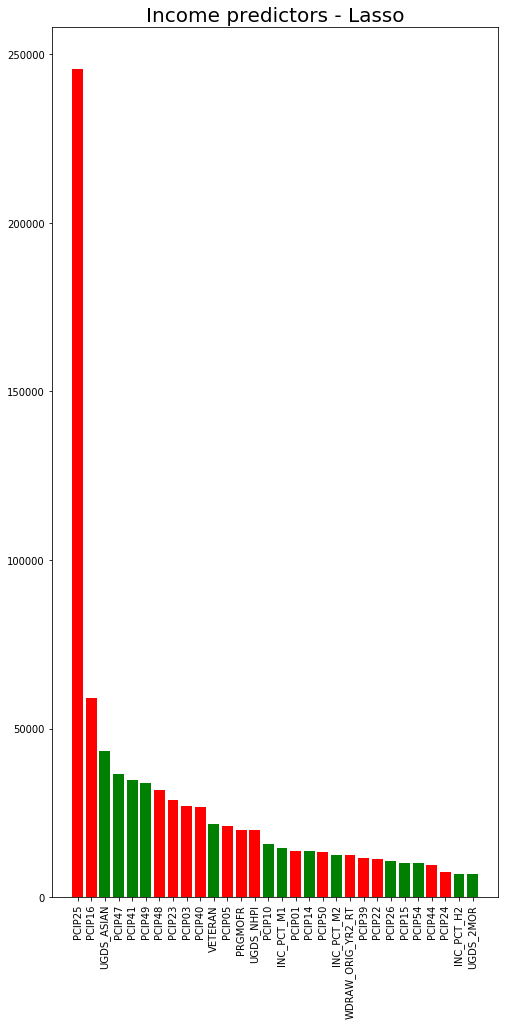

In [199]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Lasso")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'lasso_income_predictor.png', format = 'png' , bbox_inches='tight')

In [200]:
random_forest_summary_df_4

,VARIABLE NAME,importance,developer-friendly-name,NAME OF DATA ELEMENT,dev-category
0,WDRAW_ORIG_YR2_RT,0.290333,title_iv.withdrawn_by.2yrs,126 Percent withdrawn from original institu...,"126 completion Name: dev-category, dtype: o..."
1,UGDS_ASIAN,0.138686,demographics.race_ethnicity.asian,408 Total share of enrollment of undergradu...,"408 student Name: dev-category, dtype: object"
2,FAMINC_IND,0.137252,demographics.avg_family_income_independents,372 Average family income for independent s...,"372 student Name: dev-category, dtype: object"
3,TUITFTE,0.096664,tuition_revenue_per_fte,358 Net tuition revenue per full-time equiv...,"358 school Name: dev-category, dtype: object"
4,PCIP51,0.088223,program_percentage.health,72 Percentage of degrees awarded in Health ...,"72 academics Name: dev-category, dtype: object"
5,PCIP50,0.077466,program_percentage.visual_performing,94 Percentage of degrees awarded in Visual ...,"94 academics Name: dev-category, dtype: object"
6,SATMTMID,0.077455,sat_scores.midpoint.math,114 Midpoint of SAT scores at the instituti...,"114 admissions Name: dev-category, dtype: o..."
7,PCIP14,0.056465,program_percentage.engineering,68 Percentage of degrees awarded in Enginee...,"68 academics Name: dev-category, dtype: object"
8,DEP_COMP_ORIG_YR6_RT,0.037455,title_iv.depend.completed_by.6yrs,125 Percent of dependent students who compl...,"125 completion Name: dev-category, dtype: o..."


In [201]:
#now lets do the elastic net model

In [202]:
X = X_base_line
y = y_baseline

In [203]:
#not supposed to be here.  Should have been dropped.  All RPY column values
#X['IND_RPY_1YR_RT']


In [204]:
columns = X.columns.to_list()

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [206]:
y_train_nat = y_train

In [207]:
y_train = y_train.ravel().reshape(1,-1)

In [208]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)


In [209]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.05,l1_ratio = .4,  max_iter = 10000, tol = .1)

In [210]:
elastic_net = model.fit(X_train, y_train.ravel())
elastic_net  = model.score(X_test, y_test)
elastic_net

C:\Users\thead\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21746172929.708714, tolerance: 16698004248.356464
  positive)


0.7309477869251205

In [211]:
alpha = [0.01, .05, .1, .15, .2, .4, .6, .8, 1]
l1_ratio = [0, .2, .4, .6, .8, 1]
# Maximum number of levels in tree
fit_intercept = [True, False]
normalize = [True, False]
warm_start = [True, False]
selection = ['cyclic', 'random']
random_state = [10]

random_grid = {'alpha': alpha,
               'l1_ratio': l1_ratio,
               'fit_intercept' : fit_intercept,
               'normalize': normalize,
               'warm_start': warm_start,
               'selection': selection,
               'random_state': random_state}
random_grid

{'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1],
 'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
 'fit_intercept': [True, False],
 'normalize': [True, False],
 'warm_start': [True, False],
 'selection': ['cyclic', 'random'],
 'random_state': [10]}

In [212]:
elastic_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, verbose = 2, n_iter = 100, random_state=42, n_jobs = -1)

In [213]:
elastic_random.fit(X_train, y_train.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [240]:
predicted_y = elastic_random.predict(X_test)

In [241]:
elastic_random.score(X_test, y_test)

0.8007586262473705

In [242]:
elastic_random

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ElasticNet(alpha=0.05, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.4,
                                        max_iter=10000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.1, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                  0.4, 0.6, 0.8, 1],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
                                        'normalize': [True, False],
                                        'random_state': [10],
                                 

In [243]:
elastic_random.best_estimator_

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=10000,
           normalize=True, positive=False, precompute=False, random_state=10,
           selection='random', tol=0.1, warm_start=False)

In [244]:
model_best =elastic_random.best_estimator_

In [245]:
model_best.fit(X_train, y_train.ravel())


ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=10000,
           normalize=True, positive=False, precompute=False, random_state=10,
           selection='random', tol=0.1, warm_start=False)

In [246]:
model_best.coef_

array([ 4.87672614e+03,  1.04039220e+03,  8.59528123e+00,  0.00000000e+00,
       -0.00000000e+00, -8.13230520e+00, -3.63631685e+01, -3.11984403e+01,
        0.00000000e+00,  7.97095165e+01, -1.89417069e+01, -2.82824313e+01,
        0.00000000e+00,  2.25577378e+02,  5.10526806e+03, -3.27206247e+03,
        2.03261786e+03, -3.56862803e+03,  8.41279472e-01, -1.06391672e-01,
        3.84916253e-02,  1.08617622e-01, -0.00000000e+00, -6.56612371e-02,
       -2.86540130e-01, -4.02557149e-01, -0.00000000e+00,  2.39670932e+01,
        1.12632955e+01,  0.00000000e+00, -3.93773418e+01, -0.00000000e+00,
        1.12262412e-01,  0.00000000e+00,  1.06174766e+00,  0.00000000e+00,
        1.13323312e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        4.28851271e-01, -9.03903321e+03, -2.18541406e+04,  3.50844948e+02,
       -4.62516231e+03, -6.24040829e+03,  8.87319490e+03,  2.45880796e+03,
       -0.00000000e+00, -5.96557814e+03,  1.42536071e+04,  8.18070338e+03,
       -5.18154485e+04, -

In [247]:
columns = X_train.columns

In [248]:
elasticnet_results = {'columns': columns, 'coefficient': model_best.coef_}

In [249]:
elasticnet_results_df = pd.DataFrame(data = elasticnet_results)

In [250]:
elasticnet_results_df['abs(coef_)'] = np.abs(elasticnet_results_df['coefficient'])

In [251]:
number_of_features = 30
elasticnet_results_df = elasticnet_results_df.sort_values(by = ['abs(coef_)'], axis = 0, ascending = False).head(number_of_features)

In [252]:
elasticnet_results_df

,columns,coefficient,abs(coef_)
57,PCIP25,-212902.462359,212902.462359
52,PCIP16,-51815.448535,51815.448535
230,VETERAN,45536.079361,45536.079361
123,UGDS_ASIAN,33259.337412,33259.337412
74,PCIP49,30790.210412,30790.210412
125,UGDS_NHPI,-27686.603086,27686.603086
55,PCIP23,-26411.942068,26411.942068
72,PCIP47,23878.187399,23878.187399
42,PCIP03,-21854.140560,21854.140560
54,PCIP22,-20565.558994,20565.558994


In [253]:
mask = elasticnet_results_df['coefficient'] > 0

In [254]:
x = elasticnet_results_df['columns']
y = elasticnet_results_df['abs(coef_)']

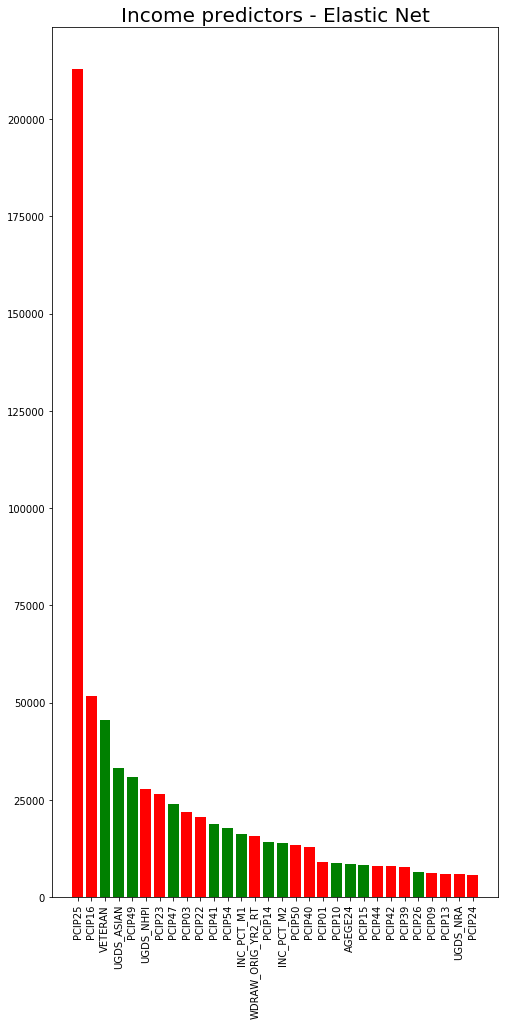

In [255]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax1 = plt.subplots(1,1, figsize=(8,16))
ax1.set_title("Income predictors - Elastic Net")
colors = np.array(['g'] * len(x))
colors[~mask.values] = 'r'
ax1.set_xticklabels(x,rotation = 90)
ax1.bar(x,y, color = colors)

plt.show()
fig.savefig(path2 + 'elastic_net_income_predictor.png', format = 'png' , bbox_inches='tight')

43 features, reduction of 85.12%


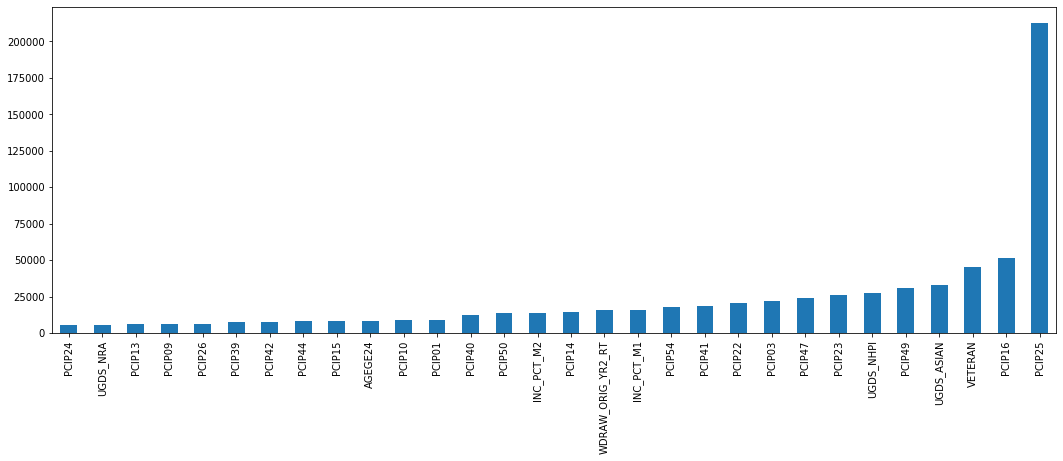

In [256]:

feature_importance = pd.Series(index = X_train.columns, data = np.abs(model_best.coef_))

n_selected_features = (feature_importance>3000).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))



In [257]:
feature_importance.sort_values(ascending = False).head(50)

PCIP25                      212902.462359
PCIP16                       51815.448535
VETERAN                      45536.079361
UGDS_ASIAN                   33259.337412
PCIP49                       30790.210412
UGDS_NHPI                    27686.603086
PCIP23                       26411.942068
PCIP47                       23878.187399
PCIP03                       21854.140560
PCIP22                       20565.558994
PCIP41                       18730.472713
PCIP54                       17730.816435
INC_PCT_M1                   16111.527238
WDRAW_ORIG_YR2_RT            15831.610185
PCIP14                       14253.607100
INC_PCT_M2                   14018.913584
PCIP50                       13492.817297
PCIP40                       12779.292609
PCIP01                        9039.033215
PCIP10                        8873.194898
AGEGE24                       8524.137038
PCIP15                        8180.703379
PCIP44                        8006.120557
PCIP42                        7974